In [1]:
from classifiers import Swap_classifier, process
from prepare_state import quantum_state
from qiskit import Aer, IBMQ, execute
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# toy test
x1 = [1, 1j, 0]
x2 = [1, -1j, 0]
x3 = [1, 1, 1]
label = [1, 0, 1]
weight = [1,1, 1]
test = [1,0, 0]

classifier = Swap_classifier(weight, [x1, x2, x3], label, test)
swap_qc = classifier.circuit()
swap_qc.draw('mpl')
job = classifier.execute(Aer.get_backend('qasm_simulator'), optimization_level=3)
ZZval = classifier.process()
ZZval

-0.087890625

In [3]:
# two qubit
n = 10
theta = np.linspace(0, np.pi, 100)
testset = np.concatenate(([np.sin(theta)], [np.cos(theta)], [np.zeros(100)]), axis=0).T
xset = np.random.rand(n, 3)+1j*np.random.rand(n, 3)
label = np.sign(np.abs(xset[:,0])**2 - np.abs(xset[:,1])**2).astype(int)
weight = np.ones(n)
testset[1]

array([0.03172793, 0.99949654, 0.        ])

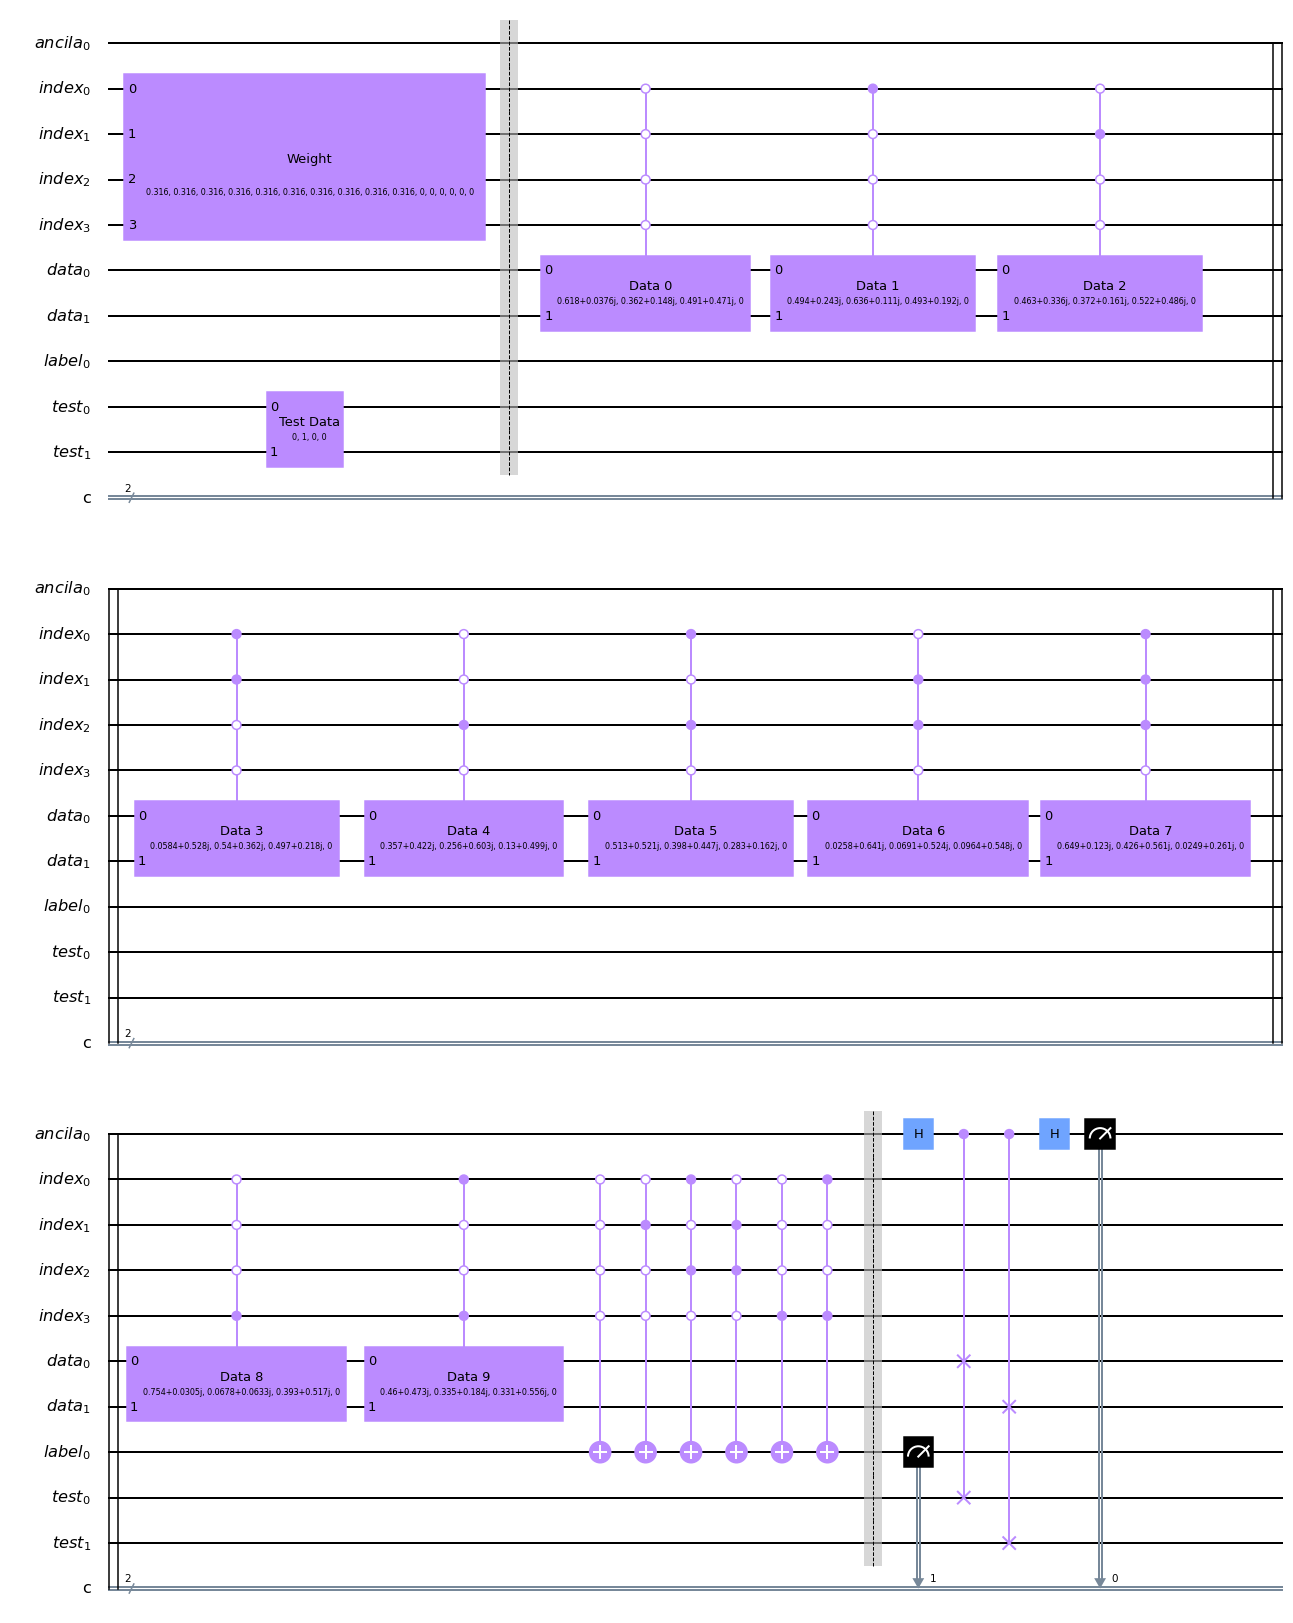

In [4]:
backend_simulator = Aer.get_backend('qasm_simulator')
qclist = [Swap_classifier(weight, xset, label, testset[i]).circuit() for i in range(len(theta))]
jobs = execute(qclist, backend=backend_simulator)
result = jobs.result().get_counts()
ZZval = [process(r) for r in result]
qclist[0].draw('mpl')

Text(0.5, 0, 'theta')

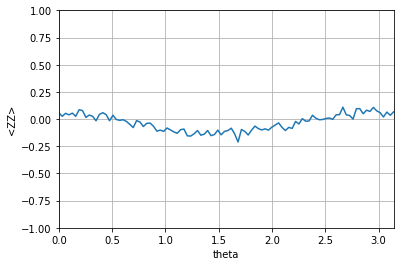

In [5]:
plt.plot(theta, ZZval)
plt.grid()
plt.ylim(-1, 1)
plt.xlim(min(theta), max(theta))
plt.ylabel('<ZZ>')
plt.xlabel('theta')

In [2]:
from qiskit import execute
help(execute)

Help on function execute in module qiskit.execute:

execute(experiments, backend, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, qobj_id=None, qobj_header=None, shots=1024, memory=False, max_credits=10, seed_simulator=None, default_qubit_los=None, default_meas_los=None, schedule_los=None, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, parameter_binds=None, schedule_circuit=False, inst_map=None, meas_map=None, scheduling_method=None, init_qubits=None, **run_config)
    Execute a list of :class:`qiskit.circuit.QuantumCircuit` or
    :class:`qiskit.pulse.Schedule` on a backend.
    
    The execution is asynchronous, and a handle to a job instance is returned.
    
    Args:
        experiments (QuantumCircuit or list[QuantumCircuit] or Schedule or list[Schedule]):
            Circu